### importing necessary libraries required for data exploration, visualisation and manipulation

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### reading the dataset and checking for the shape and also inputting hex codes for easier visualisation

In [14]:
df=pd.read_csv('/Users/soujanyabhat/Downloads/Groceries dataset.csv')

In [15]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [16]:
df.shape

(38765, 3)

In [17]:
green_shades=[
    '#006400',  # dark green
    '#228B22',  # forest green
    '#32CD32',  # lime green
    '#3CB371',  # medium sea green
    '#66CDAA',  # medium aquamarine
    '#8FBC8F',  # dark sea green
    '#98FB98',  # pale green
    '#00FF7F',  # spring green
    '#7CFC00',  # lawn green
    '#ADFF2F',  # green yellow
    '#9ACD32',  # yellow green
    '#556B2F',  # dark olive green
    '#6B8E23',  # olive drab
    '#2E8B57',  # sea green
    '#7FFF00'   # chartreuse
]

### visualising the frequently occuring items (first 15) using bar plot and 10 most frequent items using pie chart

<Axes: >

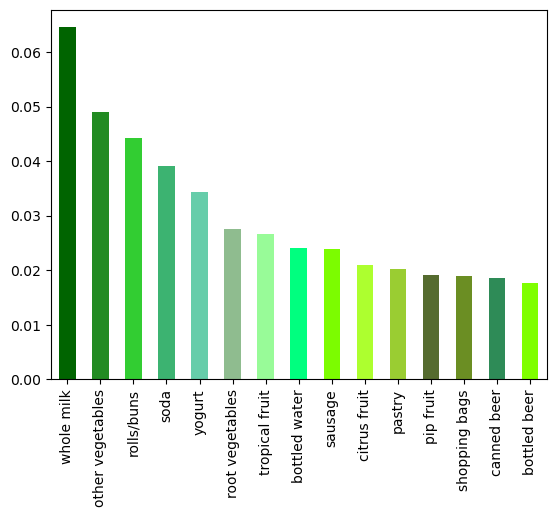

In [24]:
df.stack().value_counts().apply(lambda item: item/df.shape[0])[:15].plot(kind='bar', color=green_shades)

<Axes: ylabel='count'>

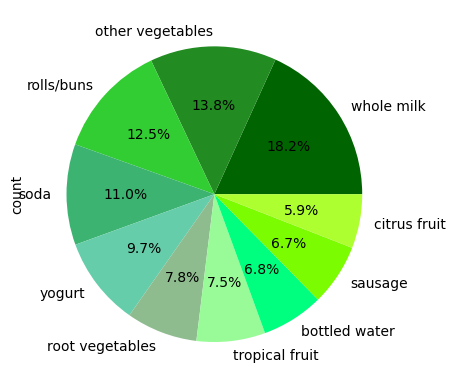

In [25]:
df.stack().value_counts().apply(lambda item: item/df.shape[0])[:10].plot(kind='pie', colors=green_shades, autopct='%1.1f%%') 

### setting index to be the member number so it appears under header and prescribing quantity = 1 and grouping the elements together 

In [29]:
df['Quantity'] = 1

In [31]:
df

,Member_number,Date,itemDescription,Quantity
0,1808,21-07-2015,tropical fruit,1
1,2552,05-01-2015,whole milk,1
2,2300,19-09-2015,pip fruit,1
3,1187,12-12-2015,other vegetables,1
4,3037,01-02-2015,whole milk,1
...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,1
38761,2022,23-02-2014,candy,1
38762,1097,16-04-2014,cake bar,1
38763,1510,03-12-2014,fruit/vegetable juice,1


In [33]:
transactions =  df.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')

In [35]:
transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### the NaN values are filled with 0 and then encoded to make it 0's and 1's (binary) from continuous to discrete

In [38]:
transactions = transactions.fillna(0)

In [40]:
transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [380]:
def encode(x):
    if x <=0:
        return 0
    elif x>=0:
        return 1
basket = transactions.applymap(encode)

/var/folders/34/5hht2rfn27q963k3nqqd28580000gn/T/ipykernel_4124/2387224811.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = transactions.applymap(encode)


In [43]:
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### the 15 most popular items are displayed and product popularity is visualised using barplot

In [47]:
item_counts = basket.sum().sort_values(ascending=False)
print("15 most popular items") 
print(item_counts.head(15))

15 most popular items
itemDescription
whole milk          1786
other vegetables    1468
rolls/buns          1363
soda                1222
yogurt              1103
tropical fruit       911
root vegetables      899
bottled water        833
sausage              803
citrus fruit         723
pastry               692
pip fruit            665
shopping bags        656
canned beer          644
bottled beer         619
dtype: int64


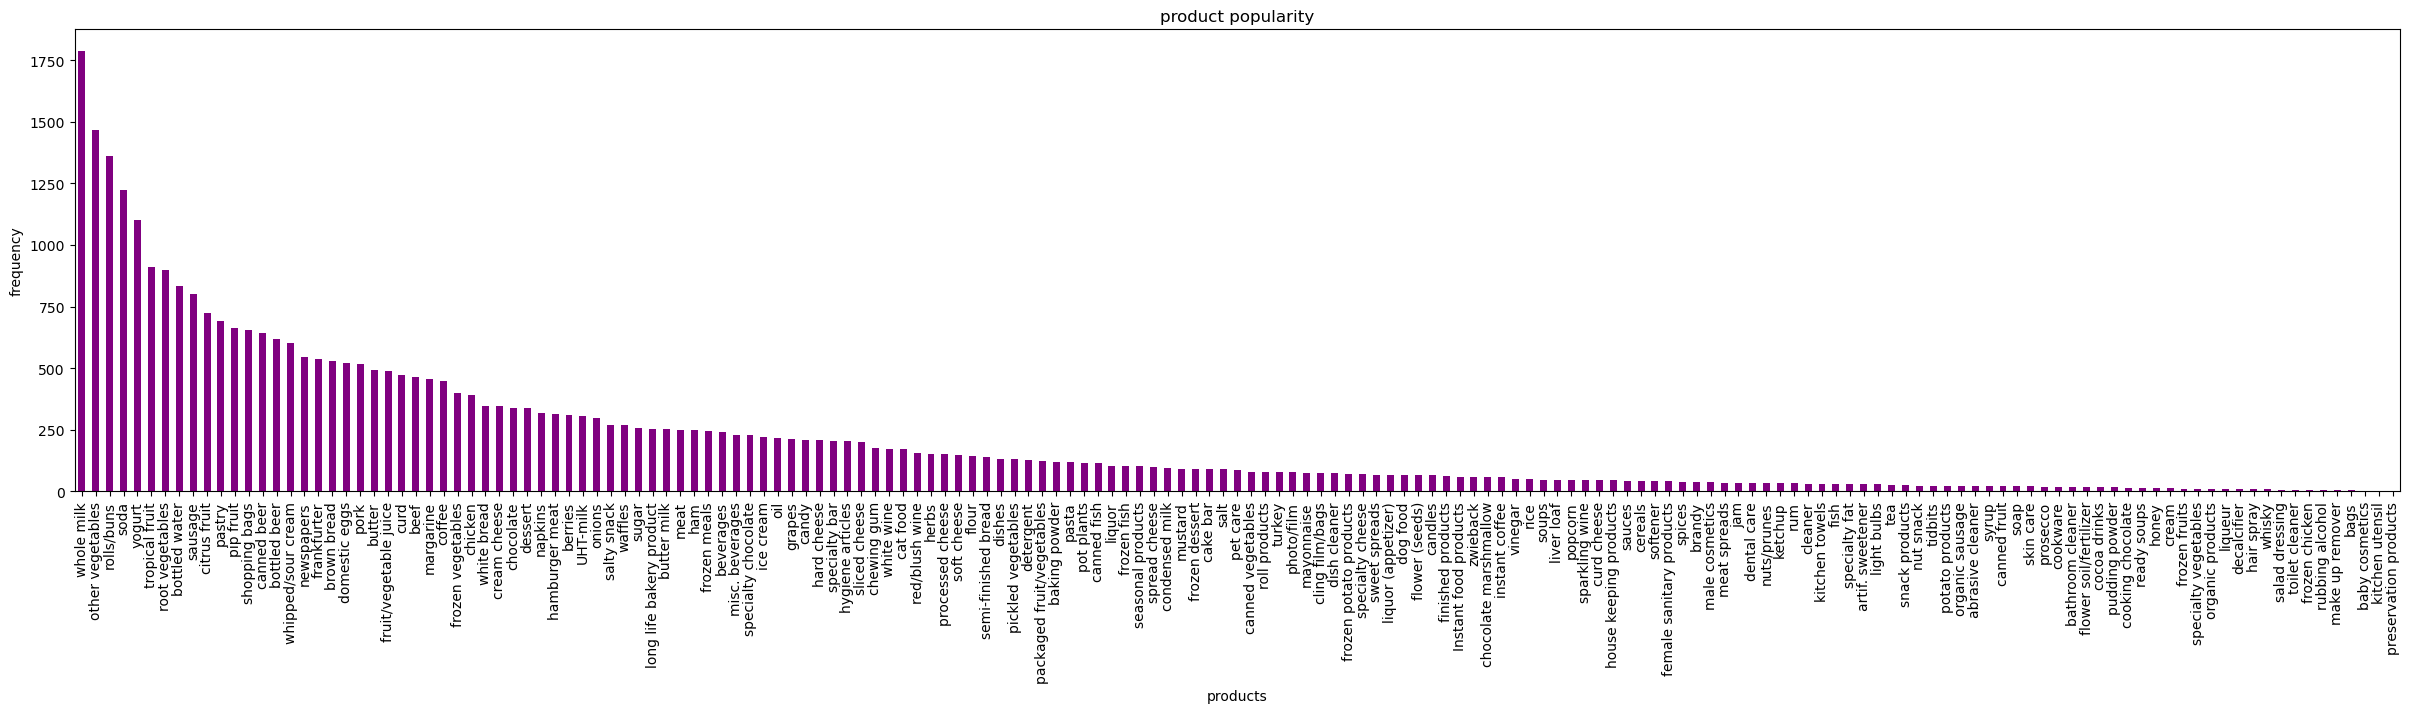

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
item_counts.plot(kind='bar', color='purple')
plt.title('product popularity')
plt.xlabel('products')
plt.ylabel('frequency')
plt.show()

### apriori algorithm is implemented by finding out the frequent itemset and by association rule mining the other metrics are obtained.
### note support here is 0.05

In [122]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemset = apriori(basket,min_support=0.05,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)

In [124]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,0.005773,1.083966,0.129082
1,(other vegetables),(beef),0.376603,0.119548,0.050795,0.134877,1.128223,0.005773,1.017719,0.182309
2,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
3,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,0.009360,1.023754,0.269364
4,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
...,...,...,...,...,...,...,...,...,...,...
253,"(yogurt, whole milk)",(soda),0.150590,0.313494,0.054387,0.361158,1.152042,0.007178,1.074611,0.155374
254,"(soda, whole milk)",(yogurt),0.151103,0.282966,0.054387,0.359932,1.271999,0.011630,1.120247,0.251899
255,(yogurt),"(soda, whole milk)",0.282966,0.151103,0.054387,0.192203,1.271999,0.011630,1.050879,0.298223
256,(soda),"(yogurt, whole milk)",0.313494,0.150590,0.054387,0.173486,1.152042,0.007178,1.027702,0.192243


### frequent itemsets sorted according to their respective support values in descending order
### top 30 frequent itemsets are plotted using barplot

In [127]:
frequent_itemsets = frequent_itemset.sort_values(by='support', ascending=False)

In [129]:
frequent_itemsets

,support,itemsets
55,0.458184,(whole milk)
37,0.376603,(other vegetables)
41,0.349666,(rolls/buns)
47,0.313494,(soda)
56,0.282966,(yogurt)
...,...,...
160,0.050539,"(tropical fruit, whole milk, other vegetables)"
158,0.050282,"(other vegetables, whole milk, sausage)"
101,0.050026,"(margarine, other vegetables)"
88,0.050026,"(curd, rolls/buns)"


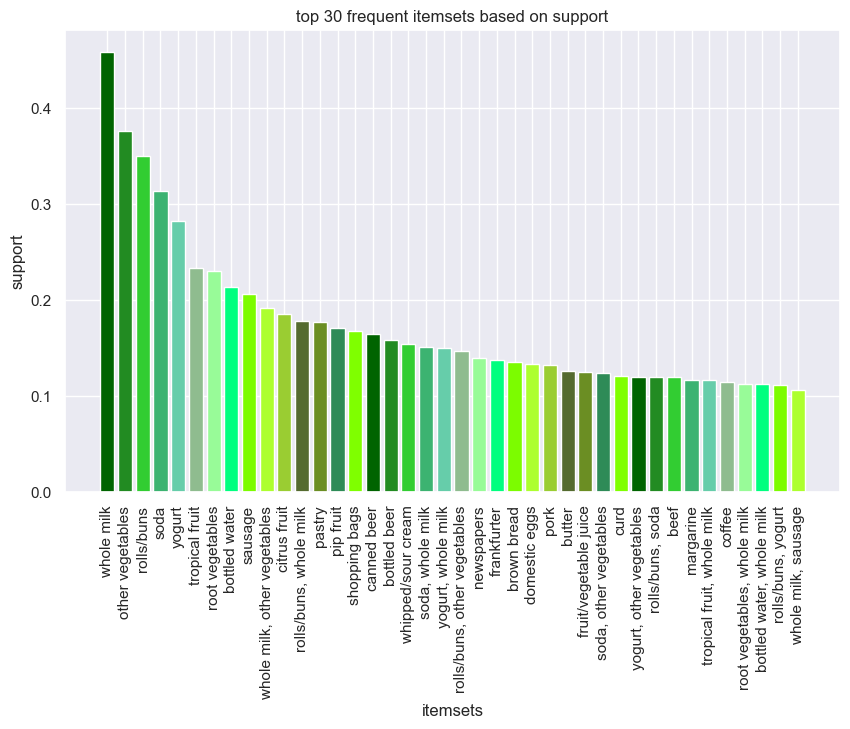

In [131]:
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
top_itemsets = frequent_itemsets.head(40)
plt.figure(figsize=(10, 6))
plt.bar(top_itemsets['itemsets'], top_itemsets['support'], color=green_shades)
plt.xticks(rotation=90)
plt.xlabel('itemsets')
plt.ylabel('support')
plt.title('top 30 frequent itemsets based on support')
plt.show()

### itemsets and other metric values generated if confidence is > 0.5 and life > 1

In [134]:
rules[(rules['confidence']>0.5) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
10,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297
22,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
31,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,0.007481,1.113034,0.124087
35,(butter),(whole milk),0.126475,0.458184,0.066188,0.523327,1.142176,0.008239,1.136661,0.142501
42,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795,0.158299
64,(curd),(whole milk),0.120831,0.458184,0.063622,0.526539,1.149188,0.008259,1.144374,0.147663
70,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766,0.152421
80,(frozen vegetables),(whole milk),0.102617,0.458184,0.055156,0.537500,1.173110,0.008139,1.171495,0.164439
90,(margarine),(whole milk),0.116983,0.458184,0.059518,0.508772,1.110410,0.005918,1.102983,0.112605


### a correlation matrix is plotted to examine relationships between all metric values

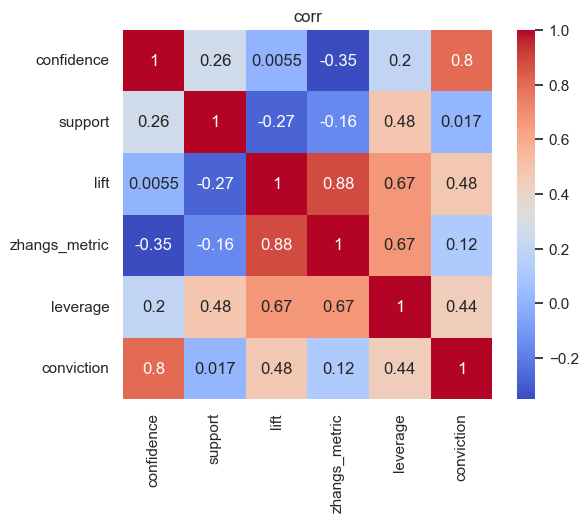

In [391]:
sns.set()
corr_matrix = rules[['confidence', 'support', 'lift', 'zhangs_metric', 'leverage', 'conviction']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('corr')
plt.show()

### importing for performing fp_growth and apriori algorithm side-by-side parallely using threads and comparing execution times to check 
### which algorithm is faster

In [143]:
import time
import threading
from mlxtend.frequent_patterns import apriori, fpgrowth

In [145]:
executiontime = [0, 0]
apriori_completed = threading.Event()
fp_completed = threading.Event()

In [159]:
def run_apriori():
    stime = time.time()
    apriori_results = apriori(basket, min_support=0.05, use_colnames=True)
    executiontime[0] = time.time() - stime
    apriori_completed.set()

In [197]:
fp_results = fpgrowth(basket, min_support=0.05, use_colnames=True)

In [199]:
fp_results

,support,itemsets
0,0.458184,(whole milk)
1,0.313494,(soda)
2,0.282966,(yogurt)
3,0.206003,(sausage)
4,0.177527,(pastry)
...,...,...
160,0.062340,"(whole milk, fruit/vegetable juice)"
161,0.053617,"(rolls/buns, fruit/vegetable juice)"
162,0.052591,"(other vegetables, fruit/vegetable juice)"
163,0.066957,"(pork, whole milk)"


In [201]:
rules1 = association_rules(fp_results,metric='lift',min_threshold=1)

In [203]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971,0.071966
1,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310,0.091184
2,(rolls/buns),(soda),0.349666,0.313494,0.119805,0.342627,1.092928,0.010187,1.044316,0.130743
3,(soda),(rolls/buns),0.313494,0.349666,0.119805,0.382160,1.092928,0.010187,1.052593,0.123855
4,(soda),(other vegetables),0.313494,0.376603,0.124166,0.396072,1.051695,0.006103,1.032237,0.071601
...,...,...,...,...,...,...,...,...,...,...
253,(fruit/vegetable juice),(other vegetables),0.124936,0.376603,0.052591,0.420945,1.117740,0.005540,1.076575,0.120377
254,(pork),(whole milk),0.132376,0.458184,0.066957,0.505814,1.103955,0.006305,1.096381,0.108533
255,(whole milk),(pork),0.458184,0.132376,0.066957,0.146137,1.103955,0.006305,1.016116,0.173796
256,(pork),(other vegetables),0.132376,0.376603,0.055670,0.420543,1.116672,0.005816,1.075828,0.120423


In [207]:
def run_fp():
    stime = time.time()
    fp_results = fpgrowth(basket, min_support=0.05, use_colnames=True)
    executiontime[1] = time.time() - stime
    fp_completed.set()

In [209]:
apriori_thread = threading.Thread(target=run_apriori)
fp_thread = threading.Thread(target=run_fp)

In [211]:
apriori_thread.start()
fp_thread.start()

# Wait for the threads to signal completion
apriori_completed.wait()
fp_completed.wait()

# Join the threads to ensure they have finished
apriori_thread.join()
fp_thread.join()

### line graph used to plot a single point i.e. only execution time of apriori algorithm

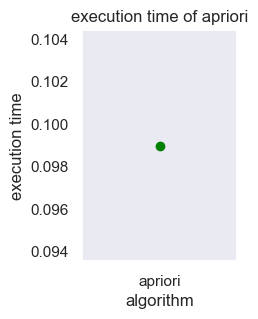

apriori execution time: 0.09897780418395996 seconds


In [214]:
algorithm = ['apriori']
exec = executiontime[0]
plt.figure(figsize=(2, 3))
plt.plot(algorithm, exec, marker='o', color='green', linestyle='-', linewidth=2)
plt.title("execution time of apriori")
plt.xlabel("algorithm")
plt.ylabel("execution time")
plt.grid(False)
plt.show()

print(f"apriori execution time: {executiontime[0]} seconds")

### line graph used to plot a single point i.e. only execution time of fp_growth algorithm

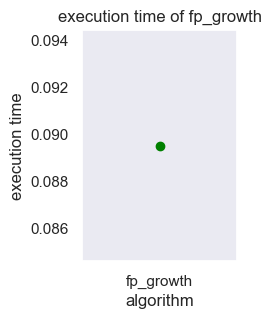

fp-growth execution time: 0.08949971199035645 seconds


In [217]:
algorithm = ['fp_growth']
exec = executiontime[1]
plt.figure(figsize=(2, 3))
plt.plot(algorithm, exec, marker='o', color='green', linestyle='-', linewidth=2)
plt.title("execution time of fp_growth")
plt.xlabel("algorithm")
plt.ylabel("execution time")
plt.grid(False)
plt.show()

print(f"fp-growth execution time: {executiontime[1]} seconds")

### plotting a horizontal barplot comparing the execution time of both apriori and fp_growth

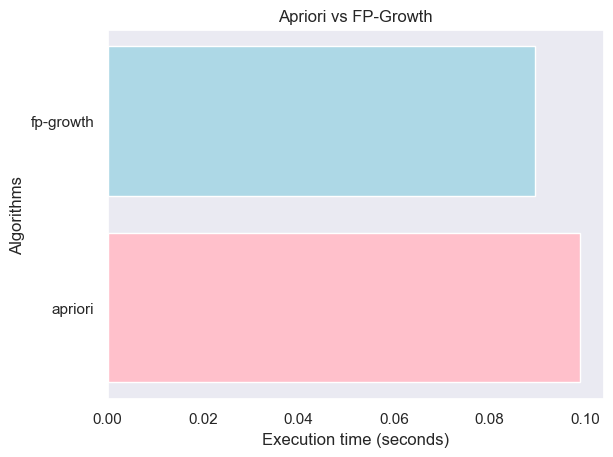

fp-growth is faster


In [220]:
comparisons = ['apriori', 'fp-growth']
plt.barh(comparisons, executiontime, color=['pink', 'lightblue'])
plt.xlabel('Execution time (seconds)')
plt.ylabel('Algorithms')
plt.title('Apriori vs FP-Growth')
plt.grid(False)
plt.show()

if executiontime[0] < executiontime[1]:
    print("apriori is faster")
elif executiontime[1] < executiontime[0]:
    print("fp-growth is faster")
else:
    print("both are equal")

### comparison of different metrics in the apriori algorithm by defining a function that calculates the average of each metric

In [235]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

def compute_average_metrics(rules):
    avg_support = rules['support'].mean()
    avg_confidence = rules['confidence'].mean()
    avg_leverage = rules['leverage'].mean()
    avg_zhangs_metric = rules['zhangs_metric'].mean()
    avg_conviction = rules['conviction'].mean()
    return avg_support, avg_confidence, avg_leverage, avg_zhangs_metric, avg_conviction

In [237]:
avg_support_apriori, avg_confidence_apriori, avg_leverage_apriori, avg_zhangs_metric_apriori, avg_conviction_apriori = compute_average_metrics(rules)
print("apriori algorithm:")
print(f"average support: {avg_support_apriori}")
print(f"average confidence: {avg_confidence_apriori}")
print(f"average leverage: {avg_leverage_apriori}")
print(f"average zhang's metric: {avg_zhangs_metric_apriori}")
print(f"average conviction: {avg_conviction_apriori}")

apriori algorithm:
average support: 0.07255161661118203
average confidence: 0.312445137524716
average leverage: 0.009226308815132957
average zhang's metric: 0.18455383497488642
average conviction: 1.068801328258811


### comparison of different metrics in the fp-growth algorithm by defining a function that calculates the average of each metric

In [240]:
def compute_average(rules1):
    avg_support = rules1['support'].mean()
    avg_confidence = rules1['confidence'].mean()
    avg_leverage = rules1['leverage'].mean()
    avg_zhangs_metric = rules1['zhangs_metric'].mean()
    avg_conviction = rules1['conviction'].mean()
    return avg_support, avg_confidence, avg_leverage, avg_zhangs_metric, avg_conviction

In [242]:
avg_support_fpgrowth, avg_confidence_fpgrowth, avg_leverage_fpgrowth, avg_zhangs_metric_fpgrowth, avg_conviction_fpgrowth = compute_average(rules1)
print("fpgrowth algorithm:")
print(f"average support: {avg_support_fpgrowth}")
print(f"average confidence: {avg_confidence_fpgrowth}")
print(f"average leverage: {avg_leverage_fpgrowth}")
print(f"average zhang's metric: {avg_zhangs_metric_fpgrowth}")
print(f"average conviction: {avg_conviction_fpgrowth}")

fpgrowth algorithm:
average support: 0.07255161661118203
average confidence: 0.31244513752471603
average leverage: 0.009226308815132958
average zhang's metric: 0.18455383497488642
average conviction: 1.068801328258811


### comparison of algorithms to check what metric values have a higher average (apriori or fp_growth)

In [359]:
if compute_average(rules1) > compute_average_metrics(rules):
    print("fp-growth has a higher average metric")
elif compute_average_metrics(rules) > compute_average(rules1):
    print("apriori has a higher average metric")
else:
    print("both are equal")     

fp-growth has a higher average metric


In [361]:
if avg_confidence_apriori > avg_confidence_fpgrowth:
    print("\napriori has higher average confidence.")
else:
    print("\nfp-growth has higher average confidence.")
    

if avg_support_apriori > avg_support_fpgrowth:
    print("apriori has higher average support.")
else:
    print("fp-growth has higher average support.")
    

if avg_leverage_apriori > avg_leverage_fpgrowth:
    print("apriori has higher average leverage.")
else:
    print("fp-growth has higher average leverage.")
    

if avg_zhangs_metric_apriori > avg_zhangs_metric_fpgrowth:
    print("apriori has higher average zhang's metric.")
else:
    print("fp-growth has higher average zhang's metric.")


if avg_conviction_apriori > avg_conviction_fpgrowth:
    print("apriori has higher average conviction.")
else:
    print("fp-growth has higher average conviction.") 


fp-growth has higher average confidence.
fp-growth has higher average support.
fp-growth has higher average leverage.
fp-growth has higher average zhang's metric.
fp-growth has higher average conviction.


### visualising the average metric values for apriori using barplot and piechart

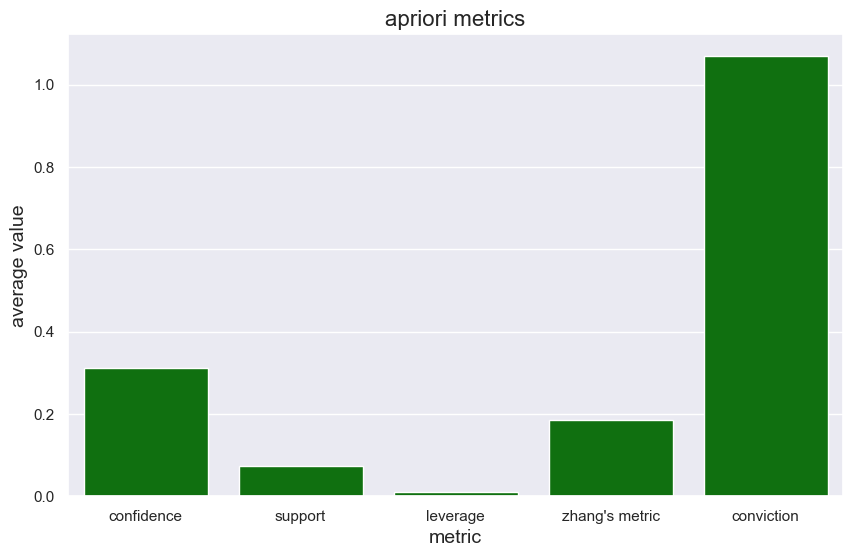

In [394]:
metrics = ['confidence', 'support', 'leverage', "zhang's metric", 'conviction']
apriori_values = [avg_confidence_apriori, avg_support_apriori, avg_leverage_apriori, avg_zhangs_metric_apriori, avg_conviction_apriori]

apriori_df = pd.DataFrame({
    'metric': metrics,
    'apriori': apriori_values
})

plt.figure(figsize=(10, 6))
sns.barplot(x='metric', y='apriori', data=apriori_df, color='green')
plt.title('apriori metrics', fontsize=16)
plt.xlabel('metric', fontsize=14)
plt.ylabel('average value', fontsize=14)
plt.show()

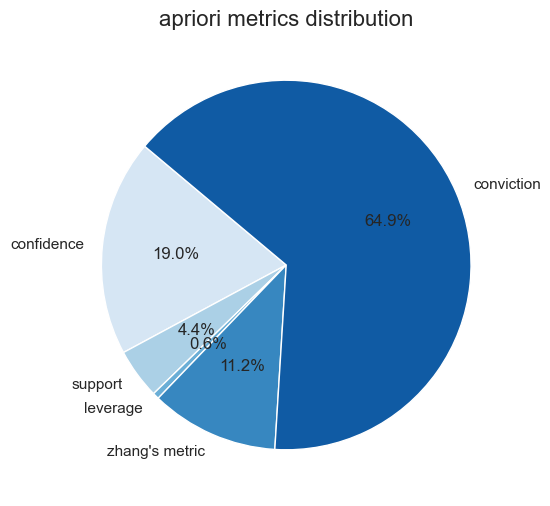

In [396]:
metrics = ['confidence', 'support', 'leverage', "zhang's metric", 'conviction']
apriori_values = [avg_confidence_apriori, avg_support_apriori, avg_leverage_apriori, avg_zhangs_metric_apriori, avg_conviction_apriori]

plt.figure(figsize=(10, 6))
plt.pie(apriori_values, labels=metrics, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues", len(metrics)))

plt.title('apriori metrics distribution', fontsize=16)
plt.show()

In [ ]:
### visualising average metric values for fp-growth using barplot and pie-chart

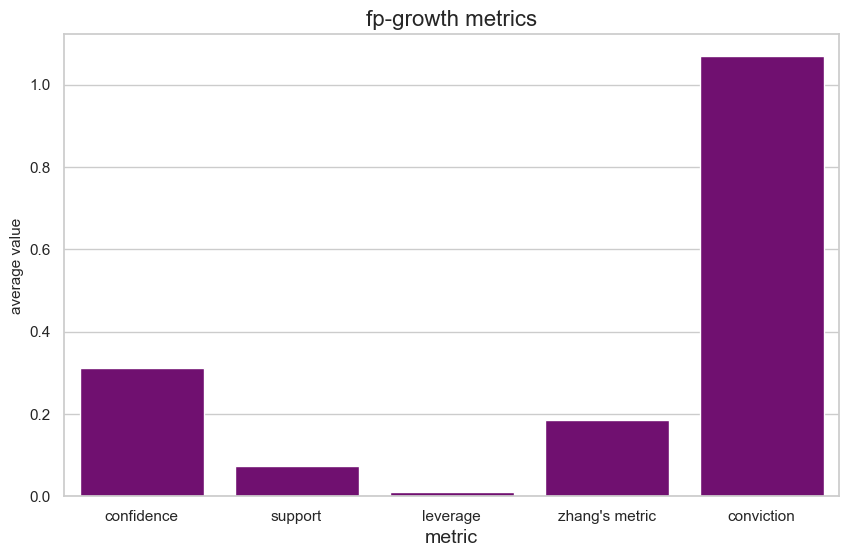

In [375]:
fpgrowth_values = [avg_confidence_fpgrowth, avg_support_fpgrowth, avg_leverage_fpgrowth, avg_zhangs_metric_fpgrowth, avg_conviction_fpgrowth]

fpgrowth_df = pd.DataFrame({
    'metric': metrics,
    'fp-growth': fpgrowth_values
})

plt.figure(figsize=(10, 6))
sns.barplot(x='metric', y='fp-growth', data=fpgrowth_df, color='purple')
plt.title('fp-growth metrics', fontsize=16)
plt.xlabel('metric', fontsize=14)
plt.ylabel('average value', fontsize=11)
plt.show()

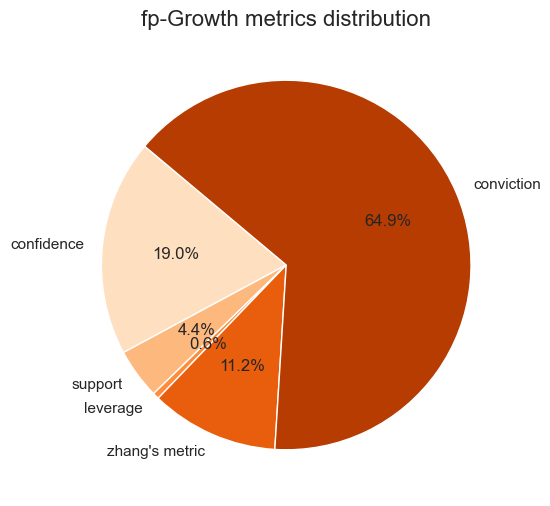

In [377]:
fpgrowth_values = [avg_confidence_fpgrowth, avg_support_fpgrowth, avg_leverage_fpgrowth, avg_zhangs_metric_fpgrowth, avg_conviction_fpgrowth]
plt.figure(figsize=(10, 6))
plt.pie(fpgrowth_values, labels=metrics, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Oranges", len(metrics)))
plt.title('fp-Growth metrics distribution', fontsize=16)
plt.show()
